# Model Parameters

In [1]:
from dotenv import load_dotenv
from anthropic import Anthropic

# Load environment variables
load_dotenv()

# Create an instance of the Anthropic class
client = Anthropic()

## Max Tokens

There are 3 required parameters that we must include every time we make a request to Claude:
* `model`
* `max_tokens`
* `messages`


### Tokens

**tokens** =  a series of word-fragments that most LLMs use as building blocks (Most Large Language Models don't "think" in full words). These small building blocks of a text sequence that Claude processes, understands, and generates texts with. When we provide a prompt to Claude, that prompt is first turned into tokens and passed to the model. The model then begins generating its output one token at a time.

For Claude, ***a token approximately represents 3.5 English characters***, though the exact number can vary depending on the language used.

#### `max_tokens` 
`max_tokens` =  controls the maximum number of tokens that Claude should generate in its response

The `max_tokens` parameter allows us to set an upper limit on how many tokens Claude generates for us.

Setting the `max_tokens` number too low will cause Claude to immediately stop as soon as it hits 10 tokens. This will often lead to truncated or incomplete outputs.


In [2]:
# Example of `max_tokens` parameter set to 10
truncated_response = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=10,
    messages=[
        {"role": "user", "content": "Write me a poem"}
    ]
)
print(truncated_response.content[0].text)

Here is a poem for you:

Golden sun


We can also check the `stop_reason` property on the response Message object to see WHY the model stopped generating. In this case, we can see that it has a value of "max_tokens" which tells us the model stopped generating because it hit our max token limit!

In [4]:
truncated_response.stop_reason

'max_tokens'

In [5]:
# Example of `max_tokens` parameter set to 500
longer_poem_response = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=500,
    messages=[
        {"role": "user", "content": "Write me a poem"}
    ]
)
print(longer_poem_response.content[0].text)

Here is a poem for you:

The Whisper of the Wind

Gently, the breeze caresses the leaves,
Whispering secrets, a melody it weaves.
Dancing shadows play upon the ground,
As the wind's soft voice makes not a sound.

It brushes my cheek, so light and free,
Carrying messages only nature can see.
The rustling trees join the serenade,
A symphony of peace, nature's own shade.

The wind's quiet call, a tranquil refrain,
Soothes the soul, eases the mind's strain.
In this moment, time seems to stand still,
As I listen, entranced, to nature's sweet thrill.


If we look at the `stop_reason` for this response, we'll see a value of "end_turn" which is the model's way of telling us that it naturally finished generating. It wrote us a poem and had nothing else to say, so it stopped!

In [6]:
longer_poem_response.stop_reason

'end_turn'

NOTE: ***Models don't "know" about `max_tokens` when generating content.***

Changing `max_tokens` won't alter how Claude generates the output, it just gives the model room to keep generating (with a high `max_tokens` value) or truncates the output (with a low `max_tokens` value).

NOTE: ***Increasing `max_tokens` does not ensure that Claude actually generates a specific number of tokens.*** If we ask Claude to write a joke and set max_tokens to 1000, we'll almost certainly get a response that is much shorter than 1000 tokens.

In [7]:
# Example of `max_tokens` parameter set to 1000
response = client.messages.create(
    model="claude-3-haiku-20240307",
    max_tokens=1000,
    messages=[{"role": "user", "content": "Tell me a joke"}]
)

In [8]:
print(response.content[0].text)

Okay, here's a silly joke for you:

Why was the math book sad?
Because it had too many problems!


In [ ]:
# Only 30 tokens were used (when I ran it at this instance)
print(response.usage.output_tokens)

30


### Why alter max tokens?

Understanding tokens is crucial when working with Claude, particularly for the following reasons:
* **API limits**: The number of tokens in your input text and the generated response count towards the API usage limits. Each API request has a maximum limit on the number of tokens it can process. Being aware of tokens helps you stay within the API limits and manage your usage efficiently.
* **Performance**: The number of tokens Claude generates directly impacts the processing time and memory usage of the API. Longer input texts and higher max_tokens values require more computational resources. Understanding tokens helps you optimize your API requests for better performance.
* **Response quality**: Setting an appropriate max_tokens value ensures that the generated response is of sufficient length and contains the necessary information. If the max_tokens value is too low, the response may be truncated or incomplete. Experimenting with different max_tokens values can help you find the optimal balance for your specific use case.

Let's take a look at how the number of tokens generated by Claude can impact performance. The following function asks Claude to generate a very long dialogue between two characters three different times, each with a different value for `max_tokens`. It then prints out how many tokens were actually generated and how long the generation took.

In [ ]:
# compare_num_tokens_speed()
import time
def compare_num_tokens_speed():
    token_counts = [100,1000,4096]
    task = """
        Create a long, detailed dialogue that is at least 5000 words long between two characters discussing the impact of social media on mental health. 
        The characters should have differing opinions and engage in a respectful thorough debate.
    """

    for num_tokens in token_counts:
        start_time = time.time()

        response = client.messages.create(
            model="claude-3-haiku-20240307",
            max_tokens=num_tokens,
            messages=[{"role": "user", "content": task}]
        )

        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Number of tokens generated: {response.usage.output_tokens}")
        print(f"Execution Time: {execution_time:.2f} seconds\n")

In [3]:
compare_num_tokens_speed()

Number of tokens generated: 100
Execution Time: 0.93 seconds

Number of tokens generated: 1000
Execution Time: 6.63 seconds

Number of tokens generated: 3709
Execution Time: 27.90 seconds



As you can see, the more tokens that Claude generates, the longer it takes!

For an even more obvious example, we asked Claude to repeat back a very long piece of text and used max_tokens to cut off the generation at various output sizes. We repeated this 50 times for each size and calculated the average generation times. As you can see, as the output size grows so does the time it takes! Take a look at the following plot:

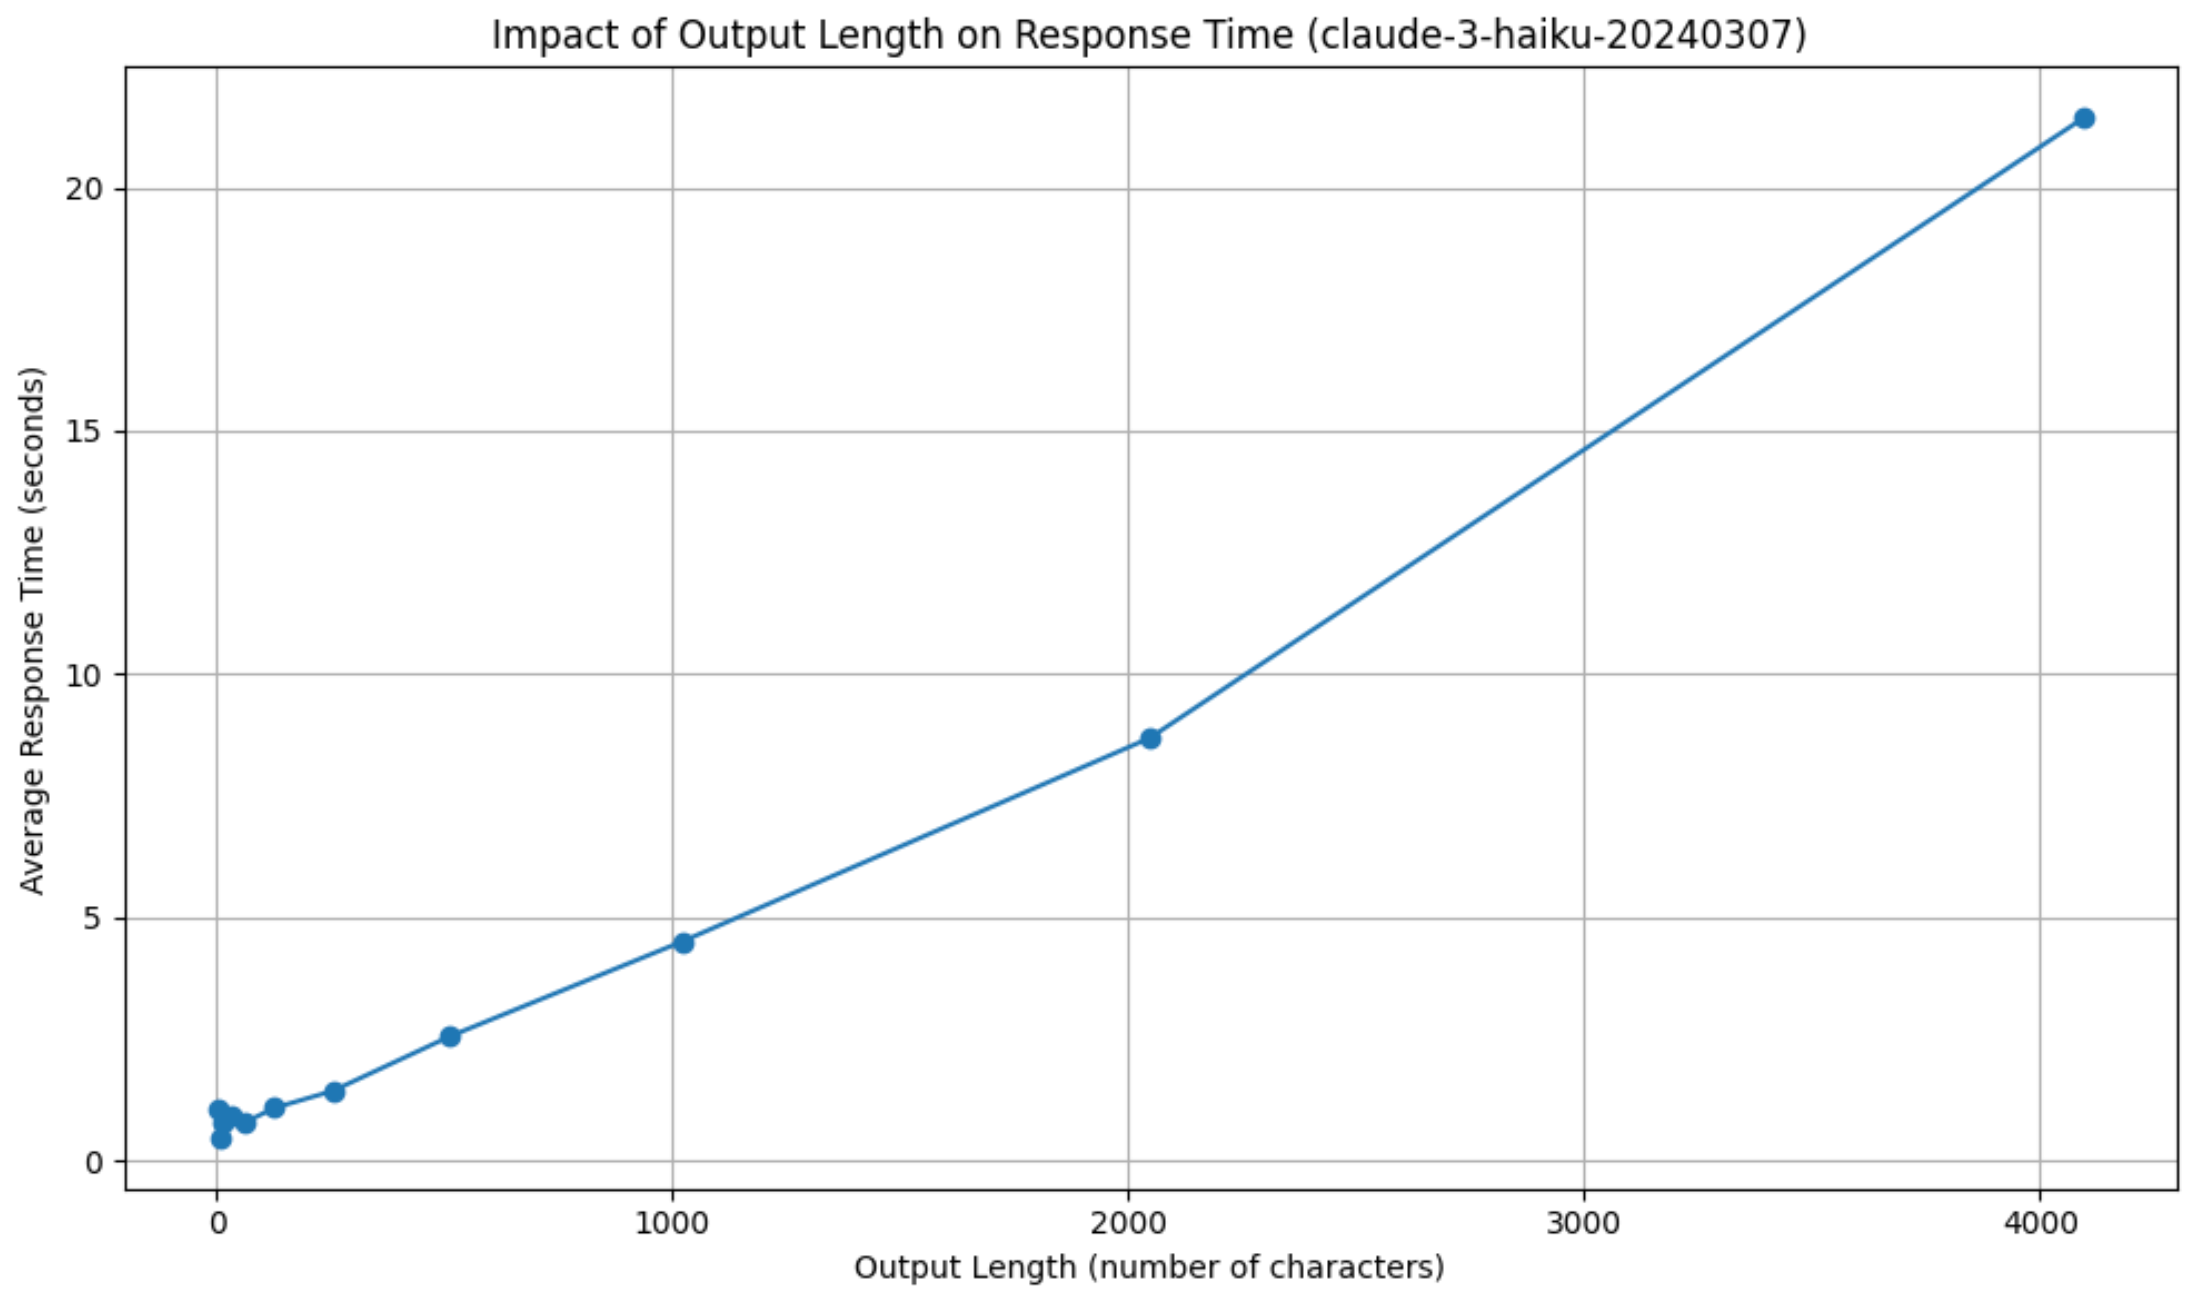

### Stop Sequences